In [1]:
import pandas as pd

### 1. AU interest rate

In [2]:
audf = pd.read_csv("../data/interest_rate_au.csv")
audf.shape

(8183, 3)

In [3]:
def clean_data(df):
    df["date"] = pd.to_datetime(df["date"])
    df = df[["date", "rate"]]
    return df

In [4]:
audf

,date,rate,country
0,2011-01-04,4.75,AU
1,1990-08-06,14.00,AU
2,1990-08-07,14.00,AU
3,1990-08-08,14.00,AU
4,1990-08-09,14.00,AU
...,...,...,...
8178,2010-12-23,4.75,AU
8179,2010-12-24,4.75,AU
8180,2010-12-29,4.75,AU
8181,2010-12-30,4.75,AU


<AxesSubplot: xlabel='date'>

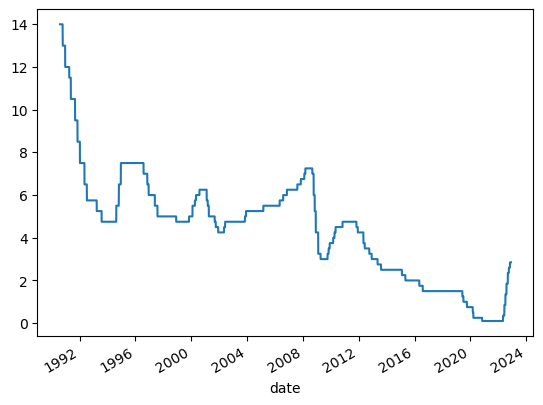

In [5]:
audf = clean_data(audf)
audf.set_index("date")["rate"].plot()

In [6]:
# Get monthly rate (is the rate of the first of month)
def get_monthly_rate(df):
    df = df.groupby(pd.PeriodIndex(df['date'], freq="M"))["rate"].first().reset_index()
    df["date"] = df["date"].dt.strftime('%Y-%m-01')
    return df

In [7]:
audf = get_monthly_rate(audf)
audf.head()

,date,rate
0,1990-08-01,14.0
1,1990-09-01,14.0
2,1990-10-01,14.0
3,1990-11-01,13.0
4,1990-12-01,13.0


In [8]:
audf.shape

(388, 2)

In [9]:
audf["country"] = "AU"

### 1. US interest rate

In [10]:
usdf = pd.read_csv("../data/interest_rate_us.csv")
usdf.shape

(820, 3)

<AxesSubplot: xlabel='date'>

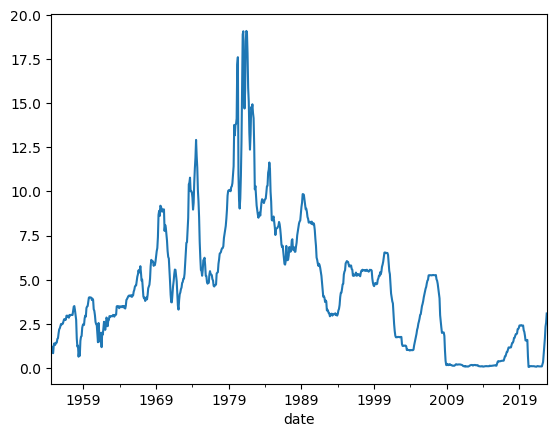

In [11]:
usdf = clean_data(usdf)
usdf.set_index("date")["rate"].plot()

In [12]:
usdf.head()

,date,rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [13]:
usdf.tail()

,date,rate
815,2022-06-01,1.21
816,2022-07-01,1.68
817,2022-08-01,2.33
818,2022-09-01,2.56
819,2022-10-01,3.08


In [14]:
usdf["country"] = "US"

### UK interest rate

In [15]:
ukdf = pd.read_csv("../data/interest_rate_uk.csv")
ukdf.shape

(3788, 2)

In [16]:
ukdf.head()

,Date,Bank Rate
0,11-01-2008,5.5
1,14-01-2008,5.5
2,15-01-2008,5.5
3,16-01-2008,5.5
4,17-01-2008,5.5


In [17]:
ukdf = ukdf.rename(columns={"Date":"date", "Bank Rate":"rate"})
# Parse correct date format
ukdf["date"] = pd.to_datetime(ukdf["date"], format='%d-%m-%Y')
ukdf.head()

,date,rate
0,2008-01-11,5.5
1,2008-01-14,5.5
2,2008-01-15,5.5
3,2008-01-16,5.5
4,2008-01-17,5.5


In [18]:
ukdf = get_monthly_rate(ukdf)
ukdf.head()

,date,rate
0,2008-01-01,5.50
1,2008-02-01,5.50
2,2008-03-01,5.25
3,2008-04-01,5.25
4,2008-05-01,5.00


In [19]:
ukdf["country"] = "UK"

### Merging data

In [20]:
# Create a monthly date range
def get_date_range(start, end):    
    date_range = pd.date_range(start=start, end=end, freq='M')
    df = pd.DataFrame({"date": date_range})
    df["date"] = df["date"].to_numpy().astype('datetime64[M]')
    return df
    
df = get_date_range(start='1/1/1996', end='10/1/2022')
df.shape

(321, 1)

In [21]:
df_list = [usdf, ukdf, audf]

def merge_date(df_list, start, end):
    dfs = []
    for adf in df_list:
        adf["date"] = pd.to_datetime(adf["date"])
        df = get_date_range(start, end)
        df = df.merge(adf, how='left', on='date')
        print(df.shape, df.columns)
        dfs.append(df)
    return dfs

dfs = merge_date(df_list, start='1/1/2016', end='10/1/2022')

(81, 3) Index(['date', 'rate', 'country'], dtype='object')
(81, 3) Index(['date', 'rate', 'country'], dtype='object')
(81, 3) Index(['date', 'rate', 'country'], dtype='object')


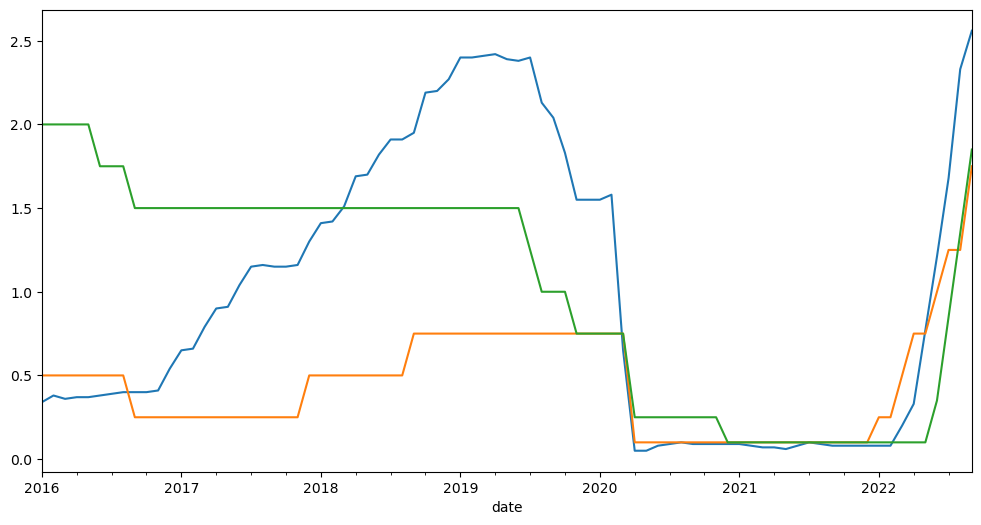

In [22]:
for df in dfs:
    df.set_index("date")["rate"].plot(figsize=(12,6))

In [23]:
dfs = pd.concat(dfs)

In [24]:
usdf.shape, audf.shape, dfs.shape

((820, 3), (388, 3), (243, 3))

In [25]:
dfs.head()

,date,rate,country
0,2016-01-01,0.34,US
1,2016-02-01,0.38,US
2,2016-03-01,0.36,US
3,2016-04-01,0.37,US
4,2016-05-01,0.37,US


In [26]:
dfs.to_csv("../data/interest_rates.csv", index=False)